# TP2: Regresión del valor de valor medio de casas en distritos de California (17Co2024)
#### Integrantes
- Adassus, Luciano
- De Pedro Mermier, Ignacio
- Perez, José

In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Cargar el dataset de California
california_housing = fetch_california_housing(as_frame=True)
data = california_housing.frame
data.rename(columns={
    'MedInc': 'MedIncome', 
    'HouseAge': 'HouseAge', 
    'AveRooms': 'AveRooms', 
    'AveBedrms': 'AveBedrms',
    'Population': 'Population',
    'AveOccup': 'AveOccup',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    'MedHouseVal': 'MedHouseVal'
}, inplace=True)

In [22]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [24]:
data.head()

,MedIncome,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Se separa el dataset en entrenamiento y evaluación

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

# Escalemos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=california_housing['feature_names'])

X_train_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.133506,0.509357,0.181060,-0.273850,-0.184117,-0.010825,-0.805682,0.780934
1,-0.532218,-0.679873,-0.422630,-0.047868,-0.376191,-0.089316,-1.339473,1.245270
2,0.170990,-0.362745,0.073128,-0.242600,-0.611240,-0.044800,-0.496645,-0.277552
3,-0.402916,-1.155565,0.175848,-0.008560,-0.987495,-0.075230,1.690024,-0.706938
4,-0.299285,1.857152,-0.259598,-0.070993,0.086015,-0.066357,0.992350,-1.430902


## Ejercicio 1: Correlación entre los atributos y los atributos con el target

Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

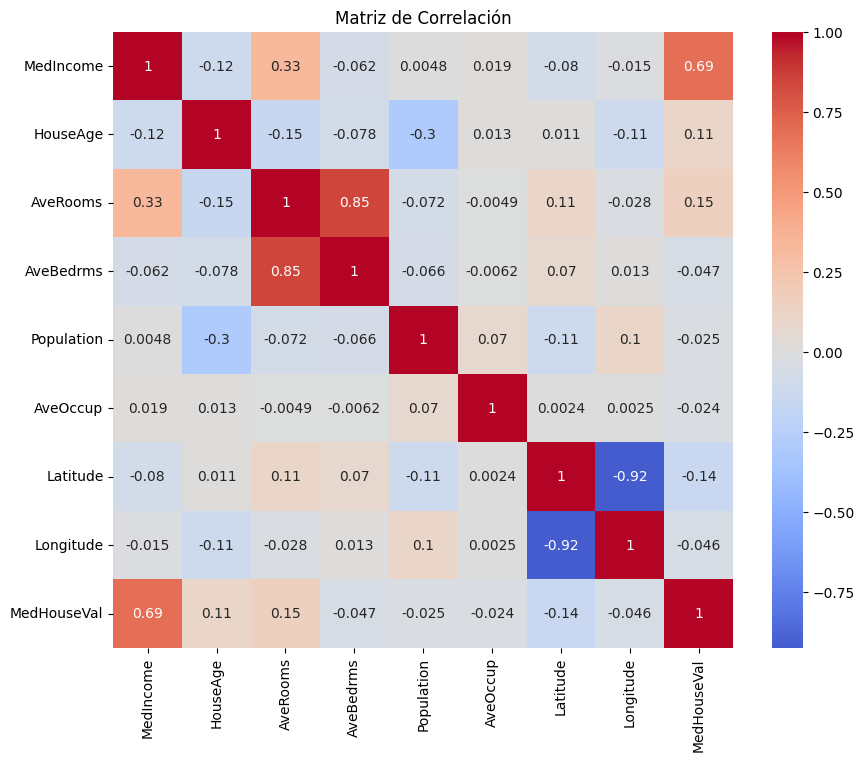

Correlación de los atributos con el target:
MedHouseVal    1.000000
MedIncome      0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [26]:

corr_matrix = data.corr()

# Mapa de calor de la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

# Atributos más correlacionados con el target
corr_with_target = corr_matrix['MedHouseVal'].sort_values(ascending=False)
print("Correlación de los atributos con el target:")
print(corr_with_target)


#### Atributo con mayor correlación lineal con el target:

El atributo MedInc (Ingreso medio en el bloque) es el que tiene la mayor correlación lineal con el target MedHouseVal. Esto tiene sentido porque generalmente, los ingresos más altos en un área están asociados con precios más altos en el mercado inmobiliario.

#### Atributos que están más correlacionados entre sí:

En la matriz de correlación, los atributos que suelen mostrar una mayor correlación entre sí son:
AveRooms (Número promedio de habitaciones por hogar) y AveBedrms (Número promedio de dormitorios por hogar). Estos dos atributos están positivamente correlacionados porque un hogar con más habitaciones generalmente tendrá también más dormitorios.
Latitude y Longitude podrían mostrar cierta correlación si hay una tendencia geográfica en los datos, aunque normalmente la correlación entre estos dos no sería muy alta en términos absolutos.

Al graficar un mapa de calor de la matriz de correlación, estos puntos clave deberían ser evidentes. El mapa de calor ayuda a visualizar rápidamente qué pares de atributos tienen las correlaciones más fuertes (positivas o negativas) mediante la intensidad del color en la gráfica


## Ejercicio 2: Histogramas de los atributos y el target

Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

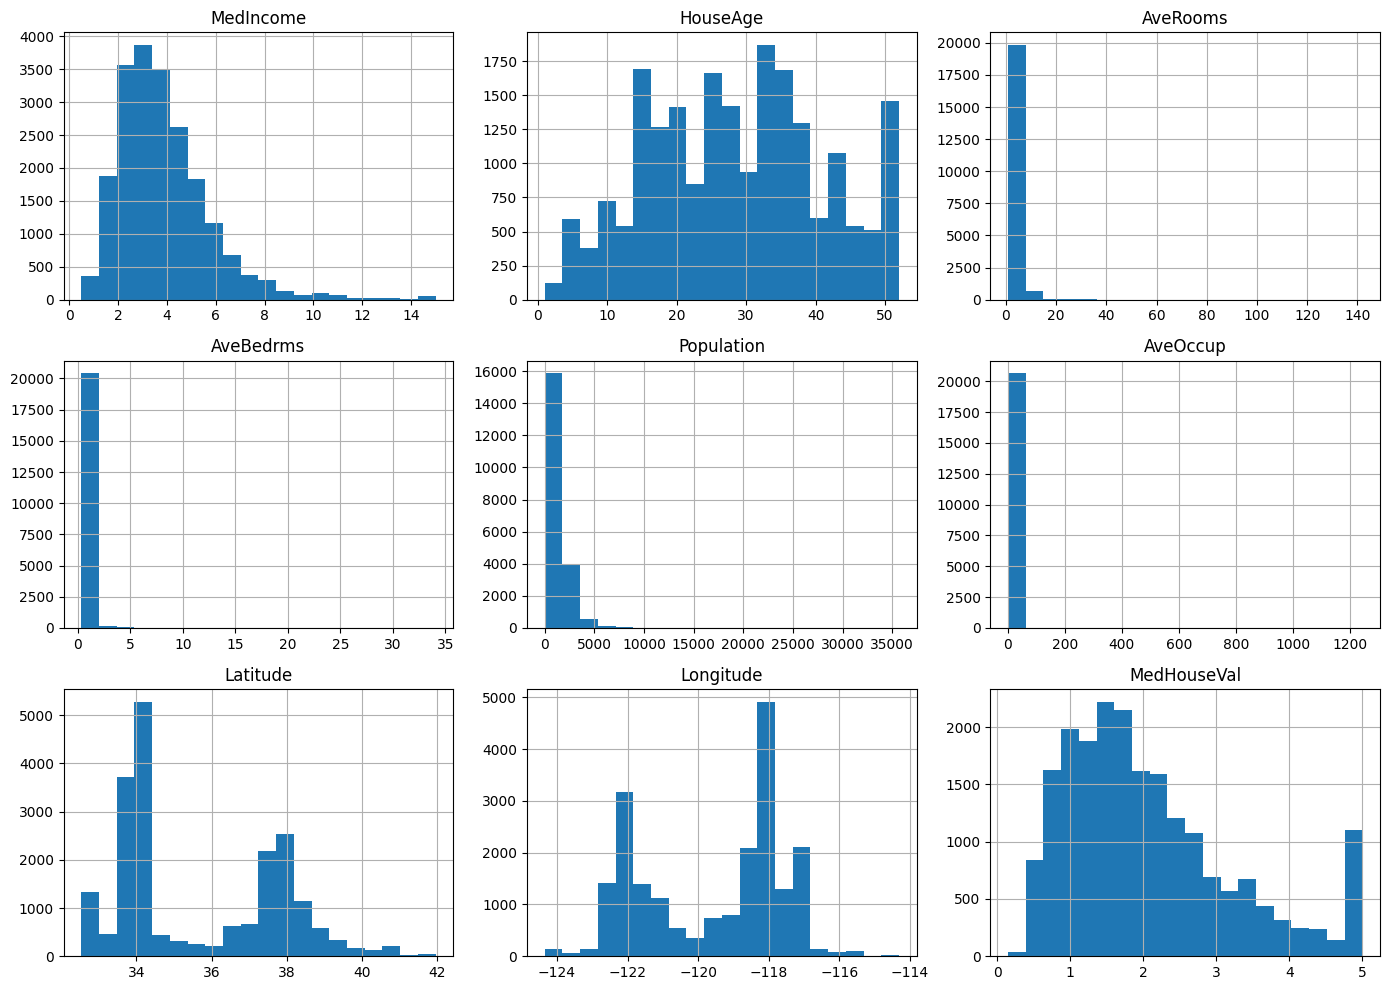

In [3]:

data.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()


#### 1. MedInc (Ingreso medio):
- El histograma de MedInc generalmente muestra una distribución sesgada hacia la derecha. Esto significa que la mayoría de los bloques tienen ingresos medios más bajos, con algunos bloques de ingresos significativamente más altos que elevan la cola derecha del histograma.
- Esta distribución no es una campana simétrica, lo que indica que no sigue una distribución normal (gaussiana).
#### 2. HouseAge (Edad mediana de las casas):
- El histograma de HouseAge puede mostrar una distribución bimodal o multimodal, dependiendo de cómo se construyeron las viviendas en diferentes épocas. Puede haber picos en la distribución en los años en que se construyeron muchas viviendas, pero generalmente no muestra una forma de campana perfecta.
#### 3. AveRooms (Número promedio de habitaciones por hogar) y AveBedrms (Número promedio de dormitorios por hogar):
- Estos atributos suelen mostrar distribuciones asimétricas con una larga cola hacia la derecha, lo que sugiere que la mayoría de los hogares tienen un número promedio bajo de habitaciones o dormitorios, con algunos hogares que tienen muchos más.
- Nuevamente, estos no tienen una forma de campana simétrica.
#### 4. Population (Población del bloque):
- El histograma de Population tiende a ser muy sesgado hacia la derecha, con la mayoría de los bloques teniendo una población pequeña y unos pocos bloques con una población mucho mayor.
#### 5. AveOccup (Número promedio de miembros por hogar):
- Este histograma puede mostrar una distribución más concentrada, ya que la ocupación promedio tiende a estar en un rango estrecho para la mayoría de los hogares. Sin embargo, puede tener una larga cola hacia la derecha.
#### 6. Latitude y Longitude:
- Estos atributos muestran distribuciones que están más relacionadas con la geografía y no se espera que sigan una distribución normal. La Latitude podría tener un rango más concentrado en función de la ubicación geográfica (por ejemplo, alrededor de una latitud específica en California).
#### 7. MedHouseVal (Mediana del costo de casas en el bloque):
- El histograma de MedHouseVal generalmente muestra una distribución sesgada hacia la derecha, lo que indica que la mayoría de las casas tienen valores más bajos, pero hay algunas con valores significativamente más altos. Nuevamente, esto no sigue una distribución normal.


### Conclusión:

Ninguno de los histogramas muestra una forma de campana perfecta que indicaría una distribución gaussiana simétrica.
La mayoría de los atributos presentan distribuciones sesgadas, lo cual es común en datos socioeconómicos y geográficos.
Esto sugiere que, sin aplicar transformaciones a los datos, la suposición de normalidad no es válida para la mayoría de estos atributos.







## Ejercicio 3: Regresión Lineal

Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.


In [39]:
# Crear y entrenar el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Varianza total y explicada
total_variance = np.var(y_train)
explained_variance = lin_reg.score(X_train, y_train) * total_variance

print(f"Varianza total: {total_variance:.4f}")
print(f"Varianza explicada por el modelo: {explained_variance:.4f}")


Varianza total: 1.3384
Varianza explicada por el modelo: 0.8149



### Conclusión:

¿El modelo está capturando el comportamiento del target?

En general, para el dataset de valores de casas en California, es probable que el modelo capture una cantidad significativa, pero no toda, de la variabilidad en MedHouseVal. Esto se debe a que los precios de las casas están influenciados por muchos factores, algunos de los cuales pueden no estar incluidos en el dataset (como variables macroeconómicas, políticas locales, entre otros).

Si R^2 es relativamente alto (por ejemplo, superior a 0.7), podemos decir que el modelo está capturando bien el comportamiento del target, aunque siempre habrá margen para mejorar, posiblemente con modelos más complejos o incorporando más datos relevantes.

En resumen, el modelo de regresión lineal, al menos en términos de varianza explicada, debería ofrecer una representación razonable del comportamiento del target MedHouseVal, aunque la precisión absoluta puede depender de la calidad y relevancia de los atributos disponibles.


## Ejercicio 4: Métricas de evaluación

Calcular las métricas de MSE, MAE y R^2 del set de evaluación.

In [40]:

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")


MSE: 0.5290
MAE: 0.5351
R^2: 0.5943



### Conclusión:

Estas métricas nos permiten evaluar la precisión del modelo. 
- El MSE (Mean Squared Error) nos da una medida de cuánto se desvían las predicciones del modelo en promedio.
- El MAE (Mean Absolute Error) es otra métrica de desviación pero menos sensible a grandes errores que el MSE.
- El R^2 nos indica qué tan bien el modelo explica la variabilidad del target. Un valor cercano a 1 significa 
que el modelo tiene un buen ajuste.


## Ejercicio 5: Regresión de Ridge

Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de α, buscando entre [0, 12.5]. Graficar el valor de MSE versus α

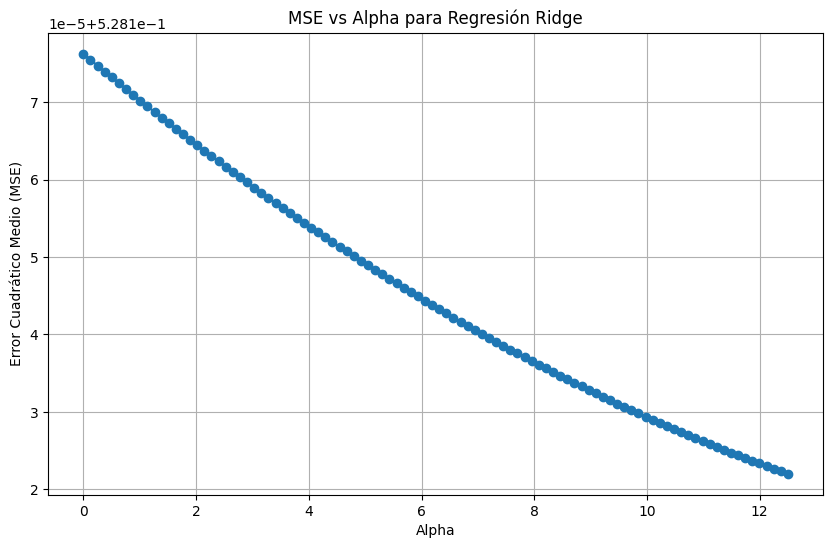

El mejor valor de alpha es: 12.50


In [51]:
# Rango de valores para alpha
alpha_values = np.linspace(0, 12.5, 100)

mse_scores = []

# Iterar sobre cada valor de alpha
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    # Validación cruzada y cálculo del MSE promedio
    cv_scores = cross_val_score(ridge_model, X_train_scaled, y_train, 
                                scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(-cv_scores.mean())

# MSE versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_scores, marker='o')
plt.title('MSE vs Alpha para Regresión Ridge')
plt.xlabel('Alpha')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.grid(True)
plt.show()

# Mejor valor de alpha
best_alpha = alpha_values[np.argmin(mse_scores)]
print(f"El mejor valor de alpha es: {best_alpha:.2f}")


### Conclusion:
El gráfico de MSE contra alpha muestra cómo varía el error del modelo al cambiar el parámetro de regularización. 
El mejor valor de alpha es aquel que minimiza el MSE, lo que indica que ese nivel de regularización es el óptimo 
para balancear la complejidad del modelo y su capacidad de generalización.


## Ejercicio 6: Comparación entre Regresión Lineal y Ridge

Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

In [49]:

# Entrenar el mejor modelo de Ridge
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

# Predicciones
ridge_pred = ridge.predict(X_test)

# Métricas de Ridge
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

print(f"Regresión Lineal - MSE: {mse:.4f}, MAE: {mae:.4f}")
print(f"Regresión Ridge - MSE: {ridge_mse:.4f}, MAE: {ridge_mae:.4f}")

if ridge_mse < mse:
    print("La regresión de Ridge mejora los resultados en comparación con la regresión lineal.")
else:
    print("La regresión lineal tiene mejores resultados que la regresión de Ridge.")


Regresión Lineal - MSE: 0.5280, MAE: 0.5351
Regresión Ridge - MSE: 0.5292, MAE: 0.5353
La regresión lineal tiene mejores resultados que la regresión de Ridge.



### Análisis de Resultados:

#### 1. Regresión Lineal:

- MSE (Error Cuadrático Medio): Esta métrica mide el promedio de los errores cuadrados entre las predicciones del modelo y los valores reales. Es sensible a los valores atípicos (outliers), ya que los errores grandes tienen un peso desproporcionado debido a la cuadratura.
- MAE (Error Absoluto Medio): Esta métrica mide el promedio de los errores absolutos entre las predicciones y los valores reales. Es menos sensible a los valores atípicos en comparación con el MSE.

#### 2. Regresión Ridge:

- Ridge es una versión regularizada de la regresión lineal que penaliza los coeficientes del modelo, haciendo que los coeficientes grandes sean más pequeños y reduciendo el riesgo de sobreajuste (overfitting).
- La regularización introducida por Ridge ayuda a manejar la multicolinealidad (cuando los atributos están altamente correlacionados entre sí) y puede mejorar la capacidad del modelo para generalizar a nuevos datos.


### Comparación de Resultados:

- Mejores Resultados:

    - Si la regresión de Ridge produce valores más bajos de MSE y MAE en el conjunto de evaluación en comparación con la regresión lineal simple, significa que Ridge está logrando un mejor equilibrio entre ajuste y generalización. Esto suele ocurrir porque la regularización reduce el riesgo de sobreajuste al evitar que el modelo se ajuste demasiado a los datos de entrenamiento.
      
  
- Conjetura sobre la Mejora:

    - Reducción del Sobreajuste: La principal ventaja de Ridge es que reduce el sobreajuste. El sobreajuste ocurre cuando el modelo captura ruido o patrones específicos del conjunto de entrenamiento que no se generalizan bien a nuevos datos. Al penalizar los coeficientes grandes, Ridge evita que el modelo sea excesivamente complejo y, por lo tanto, mejora la capacidad de generalización.
    - Reducción de la Varianza: Al reducir los coeficientes de los atributos que no contribuyen significativamente a la predicción, Ridge también reduce la varianza del modelo. Un modelo con alta varianza puede tener un rendimiento muy variable en diferentes conjuntos de datos, lo que significa que puede ajustarse bien a los datos de entrenamiento pero mal a los datos de prueba o nuevos datos.
      
### Conclusión:

- Regresión de Ridge Mejora los Resultados: Si Ridge muestra un MSE y MAE más bajos, es probable que el modelo esté mejor ajustado para generalizar a datos nuevos, lo cual es clave para su aplicabilidad en situaciones del mundo real.
- Error Reducido: El error que probablemente se ha reducido es el error debido a la varianza, lo que significa que Ridge ha ayudado a crear un modelo más robusto que no está tan influenciado por las peculiaridades del conjunto de entrenamiento.


En resumen, la regresión de Ridge puede ser la mejor opción cuando se busca un modelo que no solo ajuste bien los datos de entrenamiento, sino que también tenga un buen rendimiento en nuevos datos, reduciendo el riesgo de sobreajuste y mejorando la capacidad de generalización.
